In [47]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
from functools import reduce

In [48]:
data = pd.read_csv("Book.csv")

In [49]:
df = pd.DataFrame(data)

In [50]:
df.head(3)

,Identifier,Edition Statement,Place of Publication,Date of Publication,Publisher,Title,Author,Contributors,Corporate Author,Corporate Contributors,Former owner,Engraver,Issuance type,Flickr URL,Shelfmarks
0,206,NaN,London,1879 [1878],S. Tinsley & Co.,Walter Forbes. [A novel.] By A. A,A. A.,"FORBES, Walter.",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12641.b.30.
1,216,NaN,London; Virtue & Yorston,1868,Virtue & Co.,All for Greed. [A novel. The dedication signed...,"A., A. A.","BLAZE DE BURY, Marie Pauline Rose - Baroness",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12626.cc.2.
2,218,NaN,London,1869,"Bradbury, Evans & Co.",Love the Avenger. By the author of “All for Gr...,"A., A. A.","BLAZE DE BURY, Marie Pauline Rose - Baroness",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12625.dd.1.


In [51]:
print(df.info())
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8287 entries, 0 to 8286
Data columns (total 15 columns):
Identifier                8287 non-null int64
Edition Statement         773 non-null object
Place of Publication      8287 non-null object
Date of Publication       8106 non-null object
Publisher                 4092 non-null object
Title                     8287 non-null object
Author                    6509 non-null object
Contributors              8287 non-null object
Corporate Author          0 non-null float64
Corporate Contributors    0 non-null float64
Former owner              1 non-null object
Engraver                  0 non-null float64
Issuance type             8287 non-null object
Flickr URL                8287 non-null object
Shelfmarks                8287 non-null object
dtypes: float64(3), int64(1), object(11)
memory usage: 971.2+ KB
None
(8287, 15)


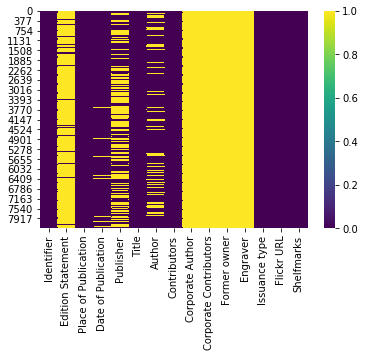

In [52]:
sns.heatmap(df.isna(), cmap = "viridis")

In [53]:
df.isna().sum()

Identifier                   0
Edition Statement         7514
Place of Publication         0
Date of Publication        181
Publisher                 4195
Title                        0
Author                    1778
Contributors                 0
Corporate Author          8287
Corporate Contributors    8287
Former owner              8286
Engraver                  8287
Issuance type                0
Flickr URL                   0
Shelfmarks                   0
dtype: int64

In [54]:
dropColumns = ['Edition Statement',
           'Corporate Author',
           'Corporate Contributors',
           'Former owner',
           'Engraver',
           'Contributors',
           'Issuance type',
           'Shelfmarks']

df.drop(dropColumns, inplace = True, axis = 1)
df.head()

,Identifier,Place of Publication,Date of Publication,Publisher,Title,Author,Flickr URL
0,206,London,1879 [1878],S. Tinsley & Co.,Walter Forbes. [A novel.] By A. A,A. A.,http://www.flickr.com/photos/britishlibrary/ta...
1,216,London; Virtue & Yorston,1868,Virtue & Co.,All for Greed. [A novel. The dedication signed...,"A., A. A.",http://www.flickr.com/photos/britishlibrary/ta...
2,218,London,1869,"Bradbury, Evans & Co.",Love the Avenger. By the author of “All for Gr...,"A., A. A.",http://www.flickr.com/photos/britishlibrary/ta...
3,472,London,1851,James Darling,"Welsh Sketches, chiefly ecclesiastical, to the...","A., E. S.",http://www.flickr.com/photos/britishlibrary/ta...
4,480,London,1857,Wertheim & Macintosh,"[The World in which I live, and my place in it...","A., E. S.",http://www.flickr.com/photos/britishlibrary/ta...


In [55]:
#Cleanaing unvanted characters
removeCharacters = ['[', "]", ',', '-']

def clean_dates(item):
    dop= str(item.loc['Date of Publication'])
    
    if dop == 'nan' or dop[0] == '[':
        return np.NaN
    
    for character in removeCharacters:
        if character in dop:
            character_index = dop.find(character)
            dop = dop[:character_index]
    
    return dop

df['Date of Publication'] = df.apply(clean_dates, axis = 1)

In [56]:
df.head()

,Identifier,Place of Publication,Date of Publication,Publisher,Title,Author,Flickr URL
0,206,London,1879,S. Tinsley & Co.,Walter Forbes. [A novel.] By A. A,A. A.,http://www.flickr.com/photos/britishlibrary/ta...
1,216,London; Virtue & Yorston,1868,Virtue & Co.,All for Greed. [A novel. The dedication signed...,"A., A. A.",http://www.flickr.com/photos/britishlibrary/ta...
2,218,London,1869,"Bradbury, Evans & Co.",Love the Avenger. By the author of “All for Gr...,"A., A. A.",http://www.flickr.com/photos/britishlibrary/ta...
3,472,London,1851,James Darling,"Welsh Sketches, chiefly ecclesiastical, to the...","A., E. S.",http://www.flickr.com/photos/britishlibrary/ta...
4,480,London,1857,Wertheim & Macintosh,"[The World in which I live, and my place in it...","A., E. S.",http://www.flickr.com/photos/britishlibrary/ta...


In [57]:
def clean_author_names(author):
    
    author = str(author)
    
    if author == 'nan':
        return 'NaN'
    
    author = author.split(',')

    if len(author) == 1:
        name = filter(lambda x: x.isalpha(), author[0])
        return reduce(lambda x, y: x + y, name)
    
    last_name, first_name = author[0], author[1]

    first_name = first_name[:first_name.find('-')] if '-' in first_name else first_name
    
    if first_name.endswith(('.', '.|')):
        parts = first_name.split('.')
        
        if len(parts) > 1:
            first_occurence = first_name.find('.')
            final_occurence = first_name.find('.', first_occurence + 1)
            first_name = first_name[:final_occurence]
        else:
            first_name = first_name[:first_name.find('.')]
    
    last_name = last_name.capitalize()
    
    return f'{first_name} {last_name}'


df['Author'] = df['Author'].apply(clean_author_names)

In [58]:
def clean_title(title):
    
    if title == 'nan':
        return 'NaN'
    
    if title[0] == '[':
        title = title[1: title.find(']')]
        
    if 'by' in title:
        title = title[:title.find('by')]
    elif 'By' in title:
        title = title[:title.find('By')]
        
    if '[' in title:
        title = title[:title.find('[')]

    title = title[:-2]
        
    title = list(map(str.capitalize, title.split()))
    return ' '.join(title)
    
df['Title'] = df['Title'].apply(clean_title)
df.head()

,Identifier,Place of Publication,Date of Publication,Publisher,Title,Author,Flickr URL
0,206,London,1879,S. Tinsley & Co.,Walter Forbes,AA,http://www.flickr.com/photos/britishlibrary/ta...
1,216,London; Virtue & Yorston,1868,Virtue & Co.,All For Greed,A. A A.,http://www.flickr.com/photos/britishlibrary/ta...
2,218,London,1869,"Bradbury, Evans & Co.",Love The Avenger,A. A A.,http://www.flickr.com/photos/britishlibrary/ta...
3,472,London,1851,James Darling,"Welsh Sketches, Chiefly Ecclesiastical, To The...",E. S A.,http://www.flickr.com/photos/britishlibrary/ta...
4,480,London,1857,Wertheim & Macintosh,"The World In Which I Live, And My Place In It",E. S A.,http://www.flickr.com/photos/britishlibrary/ta...


In [59]:
pub = df['Place of Publication']
df['Place of Publication'] = np.where(pub.str.contains('London'), 'London',
    np.where(pub.str.contains('Oxford'), 'Oxford',
        np.where(pub.eq('Newcastle upon Tyne'),
            'Newcastle-upon-Tyne', df['Place of Publication'])))

In [60]:
df.head()

,Identifier,Place of Publication,Date of Publication,Publisher,Title,Author,Flickr URL
0,206,London,1879,S. Tinsley & Co.,Walter Forbes,AA,http://www.flickr.com/photos/britishlibrary/ta...
1,216,London,1868,Virtue & Co.,All For Greed,A. A A.,http://www.flickr.com/photos/britishlibrary/ta...
2,218,London,1869,"Bradbury, Evans & Co.",Love The Avenger,A. A A.,http://www.flickr.com/photos/britishlibrary/ta...
3,472,London,1851,James Darling,"Welsh Sketches, Chiefly Ecclesiastical, To The...",E. S A.,http://www.flickr.com/photos/britishlibrary/ta...
4,480,London,1857,Wertheim & Macintosh,"The World In Which I Live, And My Place In It",E. S A.,http://www.flickr.com/photos/britishlibrary/ta...
